## FINAL PROJECT

| Mã số sinh viên | Họ tên           |
| --------------- | --------------- |
| 20120352        | Vũ Hoàng Phúc   |
| 20120322        |Đặng Thiên Long  |
| 20120236        |Phạm Tấn Anh Vũ  |

**Link github**: https://github.com/phuccr7/coding4DS

## 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from collections import Counter

## 2. Thu thập dữ liệu

### Football Players Data

Bộ dữ liệu này cung cấp thông tin chi tiết khoảng 17000 cầu thủ bóng đá của FIFA, được thu thập từ SoFIFA.com.

Nó bao gồm một loại các dữ liệu cụ thể của cầu thủ bao gồm tên , quốc tịch, câu lạc bộ, xếp hạng cầu thủ, tiềm năng, vị trí , tuổi tác và nhiều thuộc tính khác nữa. Bộ dữ liệu này lý tưởng cho những người yêu thích bóng đá, các nhà phân tích dữ liệu và những người nghiên cữu muốn tiến hành phân tích sâu, nghiên cứu thống kê hoặc thực hiện những dự án máy học liên quan tới đặc điểm, sự tiến triển sự nghiệp của các cầu thủ bóng đá. 

**License**: Apache 2.0  :  Giấy phép này cho phép người dùng có thể tự do  sử dụng tập dữ liệu với mọi mục đích mà không có bất kỳ rủi ro nào.

**Cách tác giả thu thập dữ liệu:**  Crawl dữ liệu các cầu thủ từ web https://sofifa.com./

**Nguồn**: https://www.kaggle.com/datasets/maso0dahmed/football-players-data

## 3. Khám phá dữ liệu

### Load dữ liệu

In [2]:
df=pd.read_csv('./data/fifa_players.csv')
df.head()

name                       full_name birth_date  age  height_cm   
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18  \
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...   
0        72.1   CF,RW,ST   Argentina              94         94  ...  \
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties   
0          94          48            22           94      94         75  \
1          89          46            56           84      91         67   
2          82          78            64           82      88         82   
3          84          34            26           83      87         61   
4          15          87            88           24      49         33   

  composure  marking standing_tackle  sliding_tackle  
0        96       33              28              26  
1        88       59              57              22  
2        87       63              67              67  
3        83       51              24              22  
4        80       91              88              87  

[5 rows x 51 columns]

### Dữ liệu có bao nhiêu dòng bao và bao nhiêu cột

In [3]:
n_rows,n_cols=df.shape
print(f'Số dòng : ', n_rows)
print(f'Số cột :', n_cols)

Số dòng :  17954
Số cột : 51


Như vậy ta thấy dữ liệu đưa vào có 17954 dòng và 51 cột

### Các dòng dữ liệu

#### Ý nghĩa của từng dòng dữ liệu ?

In [4]:
df.sample(10)

name                      full_name birth_date  age   
11245            L. Owusu                   Leeroy Owusu  8/13/1996   22  \
3548   A. Taylor-Sinclair          Aaron Taylor-Sinclair   4/8/1991   27   
16260             Ewerton    Ewerton José Almeida Santos  3/23/1989   29   
8031           A. Tideman                  Anton Tideman   9/2/1992   26   
5753             C. McVey              Christopher McVey  4/12/1997   21   
993         M. Goicoechea  Mauro Daniel Goicoechea Furia  3/27/1988   30   
3346         O. Threlkeld                Oscar Threlkeld  2/15/1994   25   
1727                Neris        Hueglo dos Santos Neris  6/17/1992   26   
9124          M. Peškovič                Michal Peškovič   2/8/1982   37   
3328             T. Dähne                   Thomas Dähne   1/4/1994   25   

       height_cm  weight_kgs positions  nationality  overall_rating   
11245     175.26        68.0     LB,RB  Netherlands              66  \
3548      187.96        82.1     LB,CB     Scotland              62   
16260     187.96        88.9        CB       Brazil              74   
8031      187.96        79.8        LB       Sweden              62   
5753      182.88        74.8        RB       Sweden              55   
993       185.42        82.1        GK      Uruguay              72   
3346      182.88        74.8        RB      England              63   
1727      193.04        86.2        CB       Brazil              69   
9124      187.96        88.0        GK     Slovakia              63   
3328      193.04        83.9        GK      Germany              63   

       potential  ...  long_shots  aggression interceptions  positioning   
11245         74  ...          62          73            55           57  \
3548          63  ...          30          65            58           49   
16260         74  ...          32          66            78           30   
8031          63  ...          48          73            49           37   
5753          63  ...          42          58            46           46   
993           72  ...          20          39            22           13   
3346          67  ...          37          59            60           54   
1727          74  ...          34          70            67           30   
9124          63  ...          11          18            13           11   
3328          68  ...          20          27            20           17   

       vision  penalties composure  marking standing_tackle  sliding_tackle  
11245      48         38        50       61              69              65  
3548       50         40        61       56              60              57  
16260      55         47        73       73              75              73  
8031       12         37        44       60              72              71  
5753       42         39        44       48              51              52  
993        27         22        62       13              23              24  
3346       51         39        58       61              60              60  
1727       30         48        62       71              67              66  
9124       50         23        55       22              20              18  
3328       16         26        50       10              16              13  

[10 rows x 51 columns]

• Mỗi dòng trong tập dữ liệu trên ứng với thông tin của một cầu thủ thuộc FIFA . Nhìn chung ta không thấy có dòng nào bị lạc loài ( có ý nghĩa khác so với các dòng còn lại)

#### Dữ liệu có bị lặp hay không ?

In [5]:
is_duplicated=df.duplicated().any()
is_duplicated

False

- Vì dữ liệu không bị lặp nên ta không cần tiến hành xử lý lặp. 

### Các cột dữ liệu

#### Mỗi cột có ý nghĩa gì ?

In [6]:


# Lấy danh sách các cột từ DataFrame
columns = list(df.columns.values)

# Hiển thị toàn bộ danh sách các cột
display(HTML("<table><tr>{}</tr></table>".format(
    "</tr><tr>".join("<td>{}</td>".format(column) for column in columns)
)))


| Column                         | Description                                                      |
| ------------------------------ | -----------------------------------------------------------------|
| name                           | Tên cầu thủ                                                      |
| full_name                      | Tên đầy đủ                                                       |
| birth_date                     | Ngày sinh                                                        |
| age                            | Tuổi                                                             |
| height_cm                      | Chiều cao (Đơn vị: cm)                                           |
| weight_kgs                     | Cân nặng (Đơn vị: kg)                                            |
| positions                      | Vị trí chơi của cầu thủ                                          |
| nationality                    | Quốc tịch                                                        |
| overall_rating                 | Điểm đánh giá tổng quát theo FIFA                                |
| potential                      | Điểm đánh giá tiềm năng theo thang điểm của FIFA                 |
| value_euro                     | Giá trị chuyển nhượng (Đơn vị: Euro)                             |
| wage_euro                      | Lương tính theo tuần (Đơn vị: Euro)                              |
| preferred_foot                 | Chân thuận                                                       |
| international_reputation(1-5)  | Đánh giá độ nổi tiếng từ 1-5                                     |
| weak_foot(1-5)                 | Đánh giá chân không thuận từ 1-5                                 |
| skill_moves(1-5)               | Đánh giá khả năng kĩ thuật từ 1-5                                |
| body_type                      | Loại thể hình                                                    |
| release_clause_euro            | Điều khoản giải phóng hợp đồng (Đơn vị: Euro)                    | 
| national_team                  | Đội tuyển quốc gia                                               |
| national_rating                | Xếp hạng của đội tuyển quốc gia                                  |
| national_team_position         | Vị trí chơi tại đội tuyển quốc gia                               |
| national_jersey_number         | Số áo ở đội tuyển quốc gia                                       |
| crossing                       | Chỉ số tạt bóng                                                  |
| finishing                      | Chỉ số dứt điểm                                                  |
| heading_accuracy               | Chỉ số đánh đầu                                                  |
| short_passing                  | Chỉ số chuyền ngắn                                               |
| volleys                        | Chỉ số vô lê                                                     |
| dribbling                      | Chỉ số rê bóng                                                   |
| curve                          | Chỉ số sút xoáy                                                  |
| freekick_accuracy              | Chỉ số đá phạt                                                   |
| long_passing                   | Chỉ số chuyền dài                                                |
| ball_control                   | Chỉ số kiểm soát bóng                                            |
| acceleration                   | Chỉ số tăng tốc                                                  |
| sprint_speed                   | Chỉ số chạy lướt rút                                             |
| agility                        | Chỉ số nhanh nhẹn                                                |
| reactions                      | Chỉ số phản ứng                                                  |
| balance                        | Chỉ số thăng bằng                                                |
| shot_power                     | Chỉ số lực sút                                                   |
| jumping                        | Chỉ số nhảy                                                      |
| stamina                        | Chỉ số sức bền                                                   |
| strength                       | Chỉ số thể lực                                                   |
| long_shots                     | Chỉ số sút xa                                                    |
| aggression                     | Chỉ số quyết liệt                                                |
| interceptions                  | Chỉ số đánh chặn                                                 |
| positioning                    | Chỉ số chọn vị trí                                               |
| vision                         | Chỉ số nhãn quan                                                 |
| penalties                      | Chỉ số sút penalty                                               |
| composure                      | Chỉ số bình tĩnh                                                 |
| marking                        | Chỉ số theo kèm                                                  |
| standing_tackle                | Chỉ số tắc bóng                                                  |
| sliding_tackle                 | Chỉ số xoạc bóng                                                 |


**Nhận xét**

- Ở đây có rất nhiều cột dữ liệu. Tuy nhiên các cột dữ liệu gồm một số loại chính: 
    - Thông tin cá nhân
    - Thông tin đội tuyển quốc gia
    - Thông số chuyên môn
- Để có thể dễ dàng theo dõi và phân tích ta có thể lược bỏ một số cột không cần thiết, ... 

#### Mỗi cột đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp không ?

In [7]:

df.dtypes


name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

### Nhận xét:
- Hầu như các cột đã có dữ liệu phù hợp tuy nhiên cột `birth_date` tức là ngày sinh nên được chuyển sang dạng `datetime`

#### Chuyển kiểu dữ liệu của cột `birth_date` thành `datetime`

In [8]:
# Chuyển cột birth_date sang dạng datetime
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Kiểm tra lại kiểu dữ liệu của cột birth_date
df['birth_date'].head(10)

0   1987-06-24
1   1992-02-14
2   1993-03-15
3   1991-06-04
4   1991-06-20
5   1991-07-08
6   1998-12-20
7   1988-06-02
8   1986-03-27
9   1987-02-14
Name: birth_date, dtype: datetime64[ns]

#### Với những cột dữ liệu dạng số (numerical) các giá trị được phân bố như nào ?

#### Số giá trị, giá trị trung bình, độ lệch chuẩn, min, 25 %, 50%, 70%, max của các cột dữ liệu số

In [9]:
df.describe()

birth_date           age     height_cm   
count                          17954  17954.000000  17954.000000  \
mean   1993-02-17 21:53:21.381307648     25.565445    174.946921   
min              1973-02-01 00:00:00     17.000000    152.400000   
25%              1989-11-02 00:00:00     22.000000    154.940000   
50%              1993-06-30 00:00:00     25.000000    175.260000   
75%              1996-12-30 00:00:00     29.000000    185.420000   
max              2002-02-26 00:00:00     46.000000    205.740000   
std                              NaN      4.705708     14.029449   

         weight_kgs  overall_rating     potential    value_euro   
count  17954.000000    17954.000000  17954.000000  1.769900e+04  \
mean      75.301047       66.240169     71.430935  2.479280e+06   
min       49.900000       47.000000     48.000000  1.000000e+04   
25%       69.900000       62.000000     67.000000  3.250000e+05   
50%       74.800000       66.000000     71.000000  7.000000e+05   
75%       79.800000       71.000000     75.000000  2.100000e+06   
max      110.200000       94.000000     95.000000  1.105000e+08   
std        7.083684        6.963730      6.131339  5.687014e+06   

           wage_euro  international_reputation(1-5)  weak_foot(1-5)  ...   
count   17708.000000                   17954.000000    17954.000000  ...  \
mean     9902.134628                       1.111674        2.945695  ...   
min      1000.000000                       1.000000        1.000000  ...   
25%      1000.000000                       1.000000        3.000000  ...   
50%      3000.000000                       1.000000        3.000000  ...   
75%      9000.000000                       1.000000        3.000000  ...   
max    565000.000000                       5.000000        5.000000  ...   
std     21995.593750                       0.392168        0.663691  ...   

         long_shots    aggression  interceptions   positioning        vision   
count  17954.000000  17954.000000   17954.000000  17954.000000  17954.000000  \
mean      46.852456     55.816531      46.657959     49.857302     53.406260   
min        3.000000     11.000000       3.000000      2.000000     10.000000   
25%       32.000000     44.000000      26.000000     38.000000     44.000000   
50%       51.000000     59.000000      52.000000     55.000000     55.000000   
75%       62.000000     69.000000      64.000000     64.000000     64.000000   
max       94.000000     95.000000      92.000000     95.000000     94.000000   
std       19.429337     17.394047      20.754649     19.694311     14.156038   

          penalties     composure       marking  standing_tackle   
count  17954.000000  17954.000000  17954.000000     17954.000000  \
mean      48.357302     58.680183     47.162861        47.733040   
min        5.000000     12.000000      3.000000         2.000000   
25%       38.000000     51.000000     30.000000        27.000000   
50%       49.000000     60.000000     52.500000        55.000000   
75%       60.000000     67.000000     64.000000        66.000000   
max       92.000000     96.000000     94.000000        93.000000   
std       15.810844     11.625541     20.037346        21.674973   

       sliding_tackle  
count    17954.000000  
mean        45.705915  
min          3.000000  
25%         24.000000  
50%         52.000000  
75%         64.000000  
max         90.000000  
std         21.285812  

[8 rows x 43 columns]

In [10]:
# Chọn các cột số từ DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

numerical_df=df[numerical_columns]



### Phân phối của cầu thủ theo độ tuổi

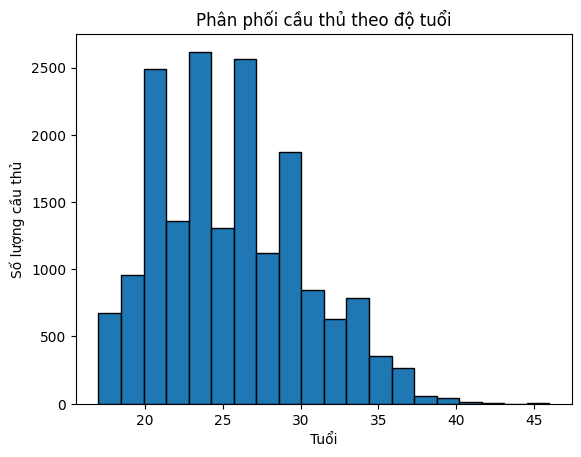

In [11]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Phân phối cầu thủ theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng cầu thủ')
plt.show()

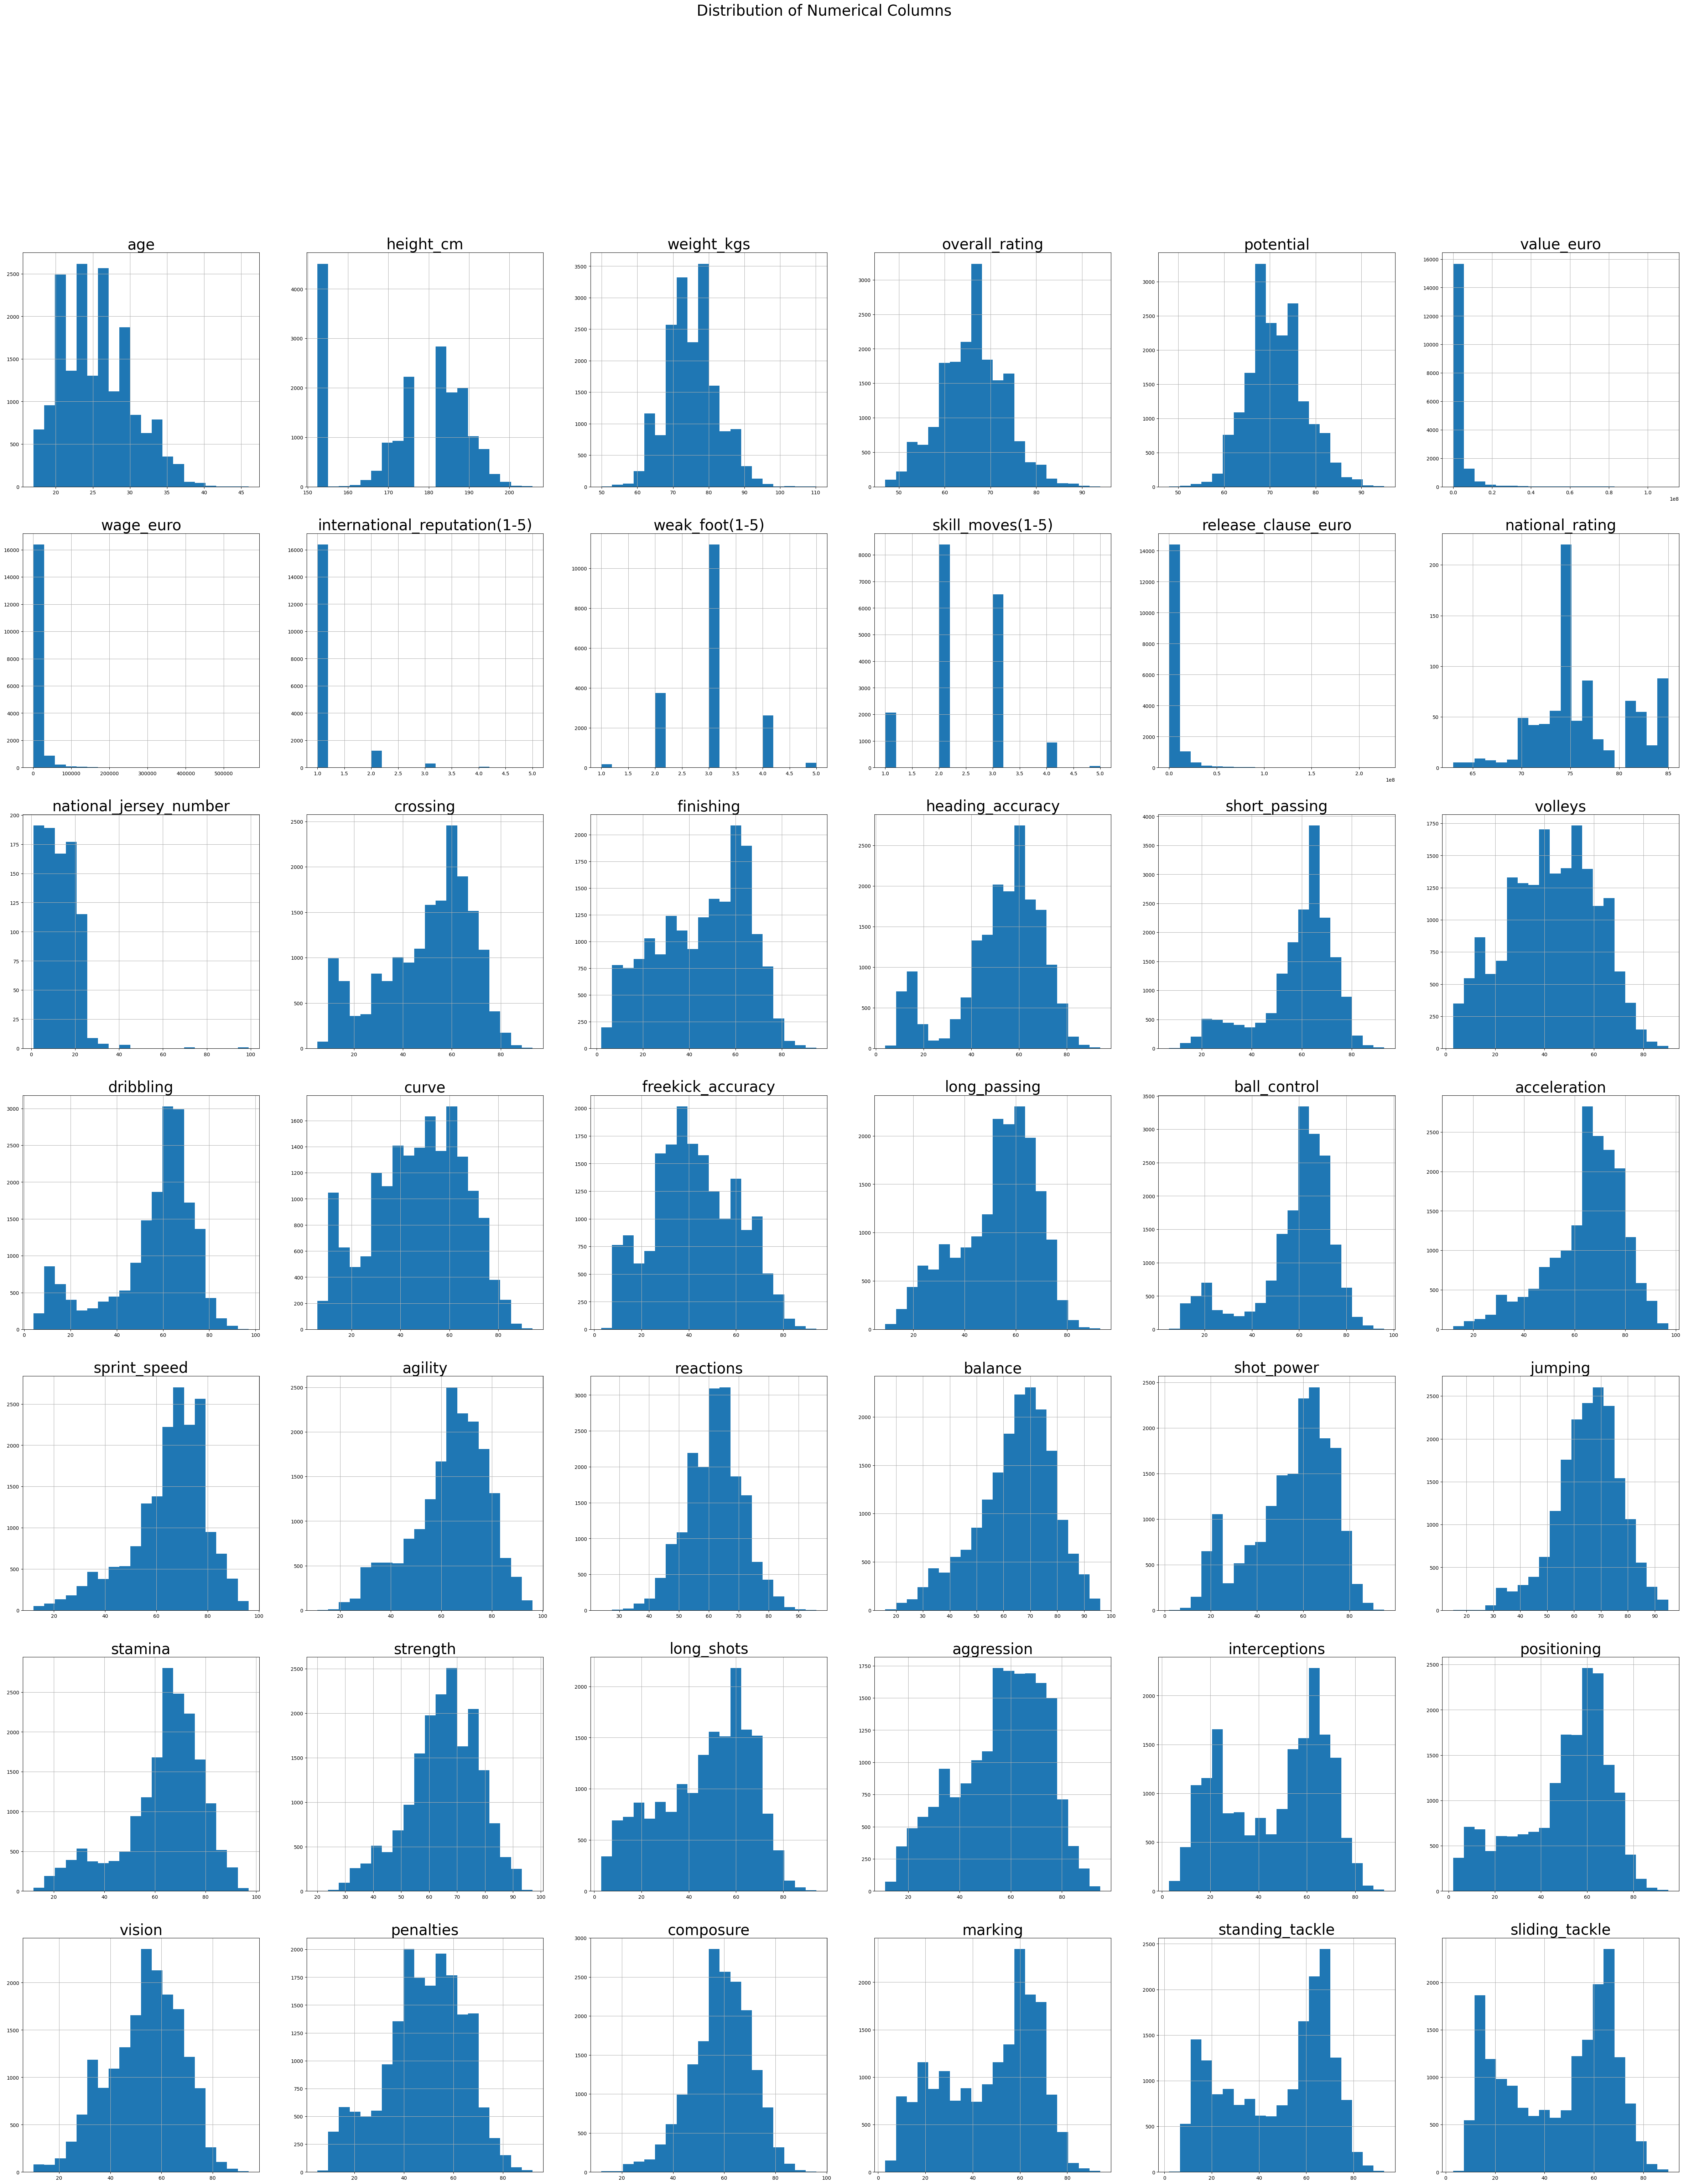

In [12]:


# Tính số dòng cần thiết dựa trên số lượng cột và số cột mong muốn
nrows = len(numerical_columns) // 6 + int(len(numerical_columns) % 6 != 0)

# Tạo biểu đồ histogram cho từng cột số
fig, axes = plt.subplots(nrows=nrows, ncols=6, figsize=(60, nrows * 10))
fig.suptitle("Distribution of Numerical Columns", fontsize=30)  # Đặt tiêu đề cho toàn bộ biểu đồ

# Vòng lặp để vẽ từng biểu đồ histogram
for i, column in enumerate(numerical_columns):
    ax = axes[i // 6, i % 6]
    df[column].hist(ax=ax, bins=20)

    ax.set_title(column, fontsize=30)  # Đặt tiêu đề cho từng biểu đồ

plt.show()

In [13]:
def missing_ratio(x):
    return x.isnull().mean() * 100

# Tạo DataFrame mới chỉ chứa các cột số
numerical_df = df[numerical_columns]

# Áp dụng hàm missing_ratio và tính giá trị tối thiểu và tối đa
result_df = numerical_df.agg([missing_ratio, 'min', 'max'])

# In kết quả
result_df

age  height_cm  weight_kgs  overall_rating  potential   
missing_ratio   0.0       0.00         0.0             0.0        0.0  \
min            17.0     152.40        49.9            47.0       48.0   
max            46.0     205.74       110.2            94.0       95.0   

                 value_euro      wage_euro  international_reputation(1-5)   
missing_ratio  1.420296e+00       1.370168                            0.0  \
min            1.000000e+04    1000.000000                            1.0   
max            1.105000e+08  565000.000000                            5.0   

               weak_foot(1-5)  skill_moves(1-5)  ...  long_shots  aggression   
missing_ratio             0.0               0.0  ...         0.0         0.0  \
min                       1.0               1.0  ...         3.0        11.0   
max                       5.0               5.0  ...        94.0        95.0   

               interceptions  positioning  vision  penalties  composure   
missing_ratio            0.0          0.0     0.0        0.0        0.0  \
min                      3.0          2.0    10.0        5.0       12.0   
max                     92.0         95.0    94.0       92.0       96.0   

               marking  standing_tackle  sliding_tackle  
missing_ratio      0.0              0.0             0.0  
min                3.0              2.0             3.0  
max               94.0             93.0            90.0  

[3 rows x 42 columns]

#### Nhận xét
- Ta có thể thấy các giá trị min, max không có gì bất thường
- Tuy nhiên 2 cột `national_rating` và `national_jersey_number` có phần trăm missing khá lớn : 95.22669	 %
- Điều này có thể giải thích là vì một đất nước có số lượng cầu thủ khá nhiều có thể lên tới hàng nghìn, hàng triệu tuy nhiên số cầu thủ được gọi lên đội tuyển quốc gia chỉ là 20-30 cầu thủ nên rất ít cầu thủ trong dữ liệu được gọi lên đội tuyển quốc gia nên 2 cột `national_rating` và `national_jersey_number` được để trống

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

#### Có 2 loại dữ liệu phân loại:

- Một câu trả lời: `nationality`, `preferred_foot`, `body_type`, `national_team`, `national_team_position`
- Nhiều câu trả lời : `positions`

#### Tỷ lệ giá trị bị thiếu

In [14]:
# Tạo một DataFrame tạm thời để lưu thông tin tỷ lệ giá trị thiếu
missing_info_df = pd.DataFrame(columns=['Column', 'Missing Percentage'])

# Lặp qua từng cột phân loại
for column in ['nationality', 'preferred_foot', 'body_type', 'national_team', 'national_team_position', 'positions']:
    # Tính tỷ lệ giá trị thiếu
    missing_percentage = df[column].isnull().mean() * 100
    
    # Thêm thông tin vào DataFrame tạm thời
    missing_info_df = pd.concat([missing_info_df, pd.DataFrame({'Column': [column], 'Missing Percentage': [missing_percentage]})], ignore_index=True)

# In DataFrame với thông tin tỷ lệ giá trị thiếu
print("\nTỷ lệ giá trị bị thiếu:")
missing_info_df


Tỷ lệ giá trị bị thiếu:


Column  Missing Percentage
0             nationality             0.00000
1          preferred_foot             0.00000
2               body_type             0.00000
3           national_team            95.22669
4  national_team_position            95.22669
5               positions             0.00000

**Nhận xét**
- Ta có thể thấy lượng giá trị bị thiếu của `national_team`  và `national_team_position` là rất lớn : 95.22669%
- Điều này cũng cùng nguyên nhân với tỷ lệ bị thiếu ở  2 cột `national_rating` và `national_jersey_number` như trên vì ít cầu thủ được gọi lên đội tuyển quốc gia


#### Phân bố của các cột có một câu trả lời 


Phân phối giá trị của 'nationality':
nationality
England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: count, dtype: int64


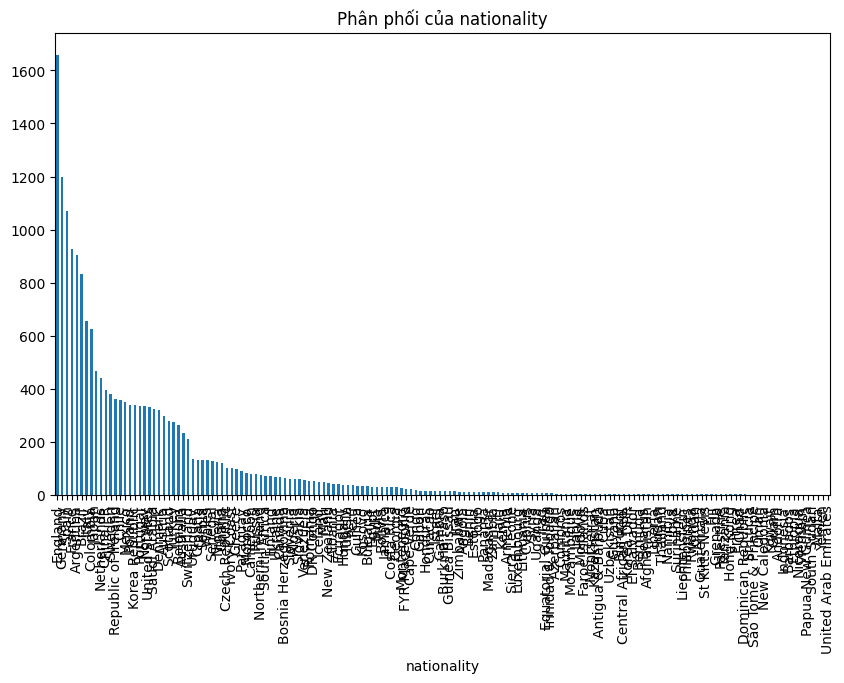


Phân phối giá trị của 'preferred_foot':
preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64


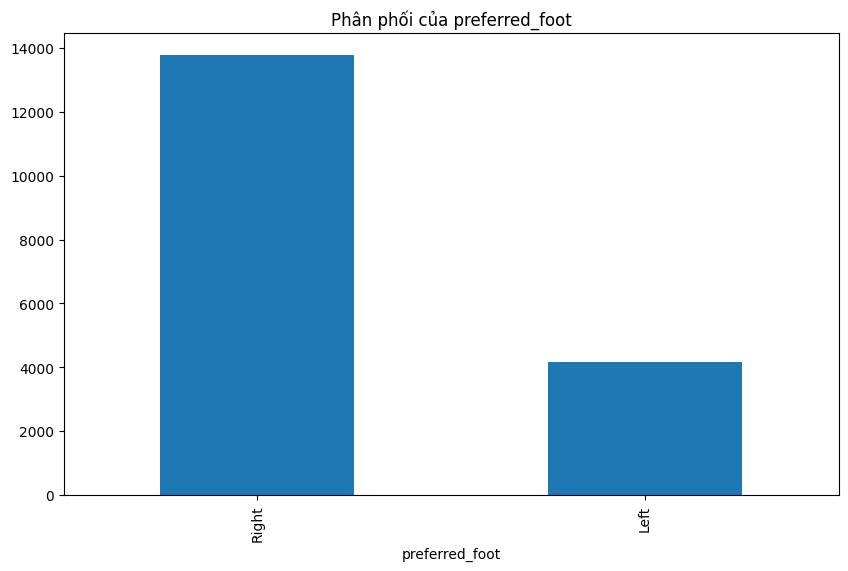


Phân phối giá trị của 'body_type':
body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64


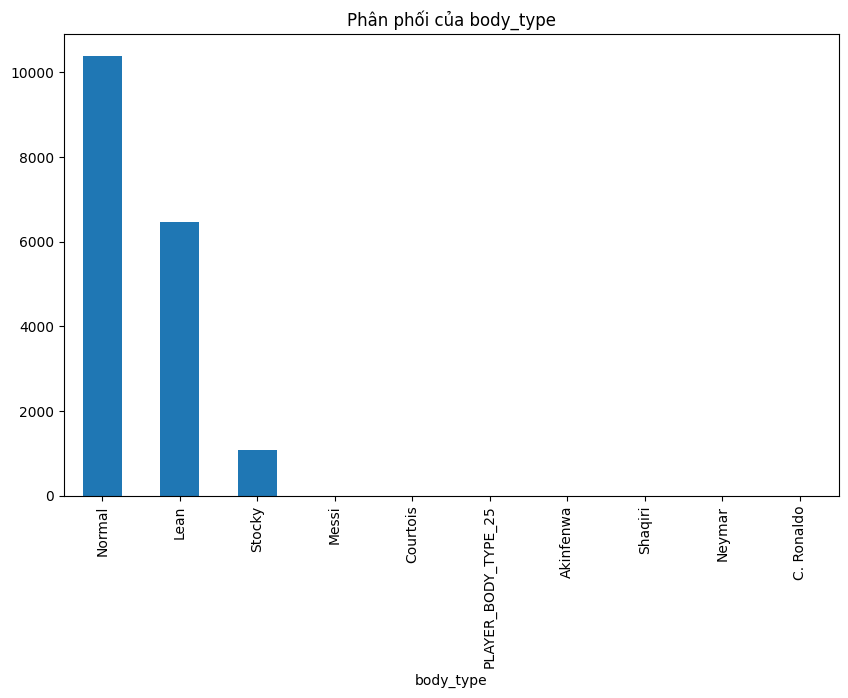


Phân phối giá trị của 'national_team':
national_team
Scotland         23
Brazil           23
France           23
Netherlands      23
Germany          23
Spain            23
Denmark          23
England          23
United States    23
Italy            22
Name: count, dtype: int64


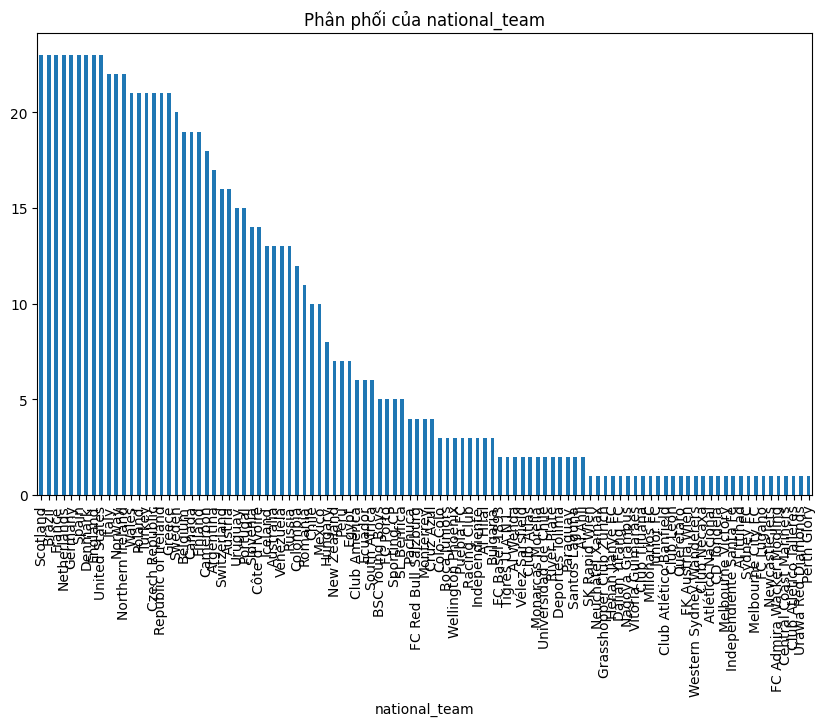


Phân phối giá trị của 'national_team_position':
national_team_position
SUB    389
GK      50
RCB     40
LCB     39
RB      34
LB      33
ST      30
LM      29
LCM     26
RM      26
Name: count, dtype: int64


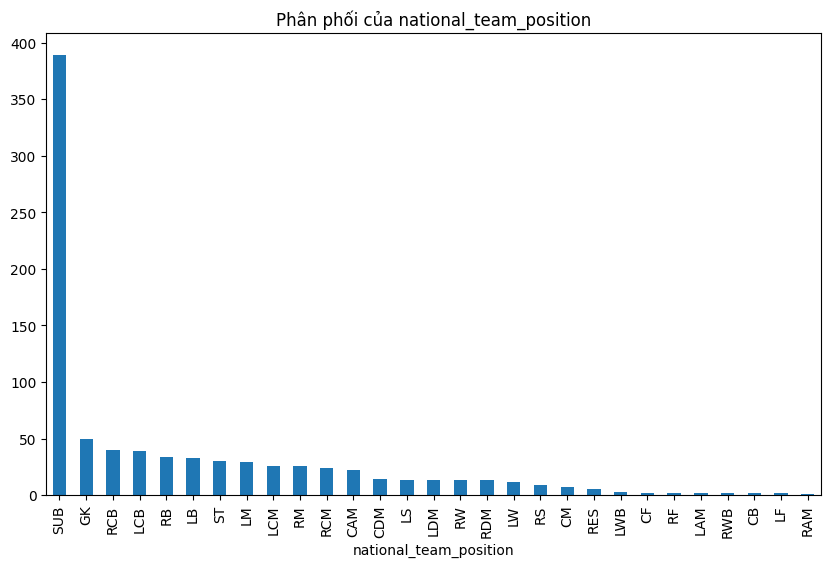

In [15]:
# Lặp qua từng cột phân loại
for column in ['nationality', 'preferred_foot', 'body_type', 'national_team', 'national_team_position']:
    # Phân phối giá trị
    value_counts = df[column].value_counts()
    
    # In phân phối giá trị (hiển thị một số giá trị đầu tiên)
    print(f"\nPhân phối giá trị của '{column}':")
    print(value_counts.head(10))
    
    # Vẽ biểu đồ cột cho phân phối giá trị
    value_counts.plot(kind='bar', figsize=(10, 6), title=f'Phân phối của {column}')
    plt.show()

#### Phân bố của các cột có một câu trả lời

In [16]:
# Tính số lượng từng giá trị trong cột positions
positions_counts = df['positions'].str.split(',').explode().value_counts()

# In số lượng từng giá trị
print("Count of each position:")
print(positions_counts)

Count of each position:
positions
CM     3795
CB     3675
ST     3173
CDM    2699
LM     2521
RM     2452
CAM    2185
GK     2065
RB     2057
LB     2039
LW      957
RW      941
CF      362
RWB     314
LWB     299
Name: count, dtype: int64


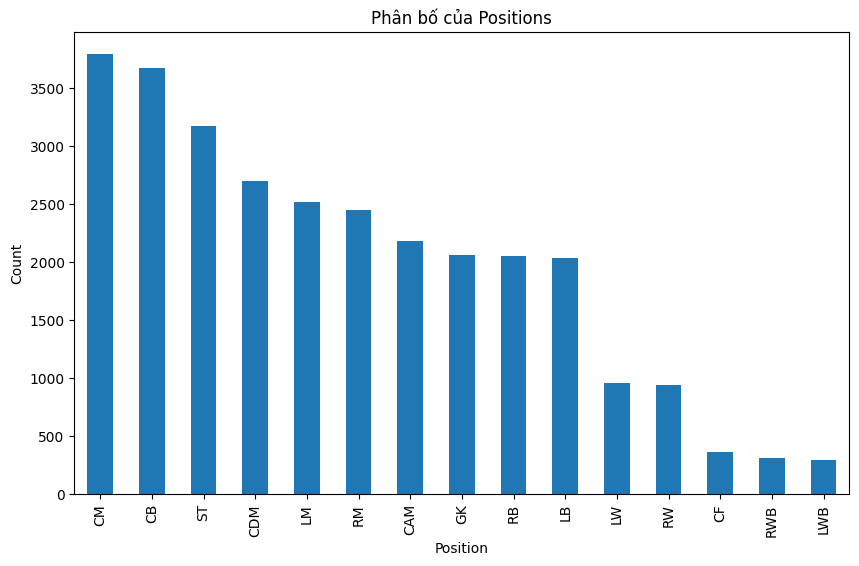

In [17]:
positions_counts.plot(kind='bar', figsize=(10, 6), title='Phân bố của Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

**Nhận xét**
- Nhìn chung các giá trị đều hợp lý
- Tuy nhiên , ta thấy ở cột `body_type` có một vài giá trị bất thường : `Messi, Courtois , PLAYER_BODY_TYPE_25, Akinfenwa  , Shaqiri , Neymar  , C.Ronaldo`. Những giá trị này là tên cầu thủ chứ không phải `body_type`.      1

#### Xóa 4 cột bị thiếu nhiều `national_jersey_number`, `national_team_position`, `national_rating`, `national_team`

In [18]:
columns_to_drop = ['national_jersey_number', 'national_team_position', 'national_rating', 'national_team']
df.drop(columns_to_drop, axis=1, inplace=True)


In [19]:
df.head()

name                       full_name birth_date  age  height_cm   
0      L. Messi  Lionel Andrés Messi Cuccittini 1987-06-24   31     170.18  \
1    C. Eriksen    Christian  Dannemann Eriksen 1992-02-14   27     154.94   
2      P. Pogba                      Paul Pogba 1993-03-15   25     190.50   
3    L. Insigne                 Lorenzo Insigne 1991-06-04   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly 1991-06-20   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...   
0        72.1   CF,RW,ST   Argentina              94         94  ...  \
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties   
0          94          48            22           94      94         75  \
1          89          46            56           84      91         67   
2          82          78            64           82      88         82   
3          84          34            26           83      87         61   
4          15          87            88           24      49         33   

  composure  marking  standing_tackle  sliding_tackle  
0        96       33               28              26  
1        88       59               57              22  
2        87       63               67              67  
3        83       51               24              22  
4        80       91               88              87  

[5 rows x 47 columns]

## 4. Đặt câu hỏi

## Câu hỏi 1:

#### Nội dung câu hỏi : Sự khác biệt về vị trí chơi giữa các cầu thủ thuận chân trái và các cầu thủ thuận chân phải ?

### Ý nghĩa:
- So sánh tỉ lệ các cầu thủ thuận chân trái và chân phải ở mỗi vị trí
- Xác định các cầu thủ thuận chân trái , các cầu thủ thuận chân phải thường thi đấu ở vị trí nào
- Định hướng cho các tài năng trẻ, cầu thủ nhí về vị trí thi đấu thuận lợi dựa theo chân thuận


In [20]:
# Tạo một bản sao của df để không làm thay đổi dữ liệu gốc
new_df = df.copy()

# Chuyển đổi cột 'positions' thành danh sách các vị trí
new_df['positions'] = new_df['positions'].str.split(',')

# Chuyển đổi dữ liệu thành dạng dài
new_df_long = new_df.explode('positions')

# Thống kê số lượng cầu thủ thuận chân trái và chân phải ở từng vị trí
position_counts = new_df_long.groupby(['positions', 'preferred_foot']).size().unstack(fill_value=0)

# In kết quả
position_counts

preferred_foot  Left  Right
positions                  
CAM              580   1605
CB               802   2873
CDM              405   2294
CF                68    294
CM               695   3100
GK               213   1852
LB              1561    478
LM              1033   1488
LW               280    677
LWB              260     39
RB                50   2007
RM               509   1943
RW               251    690
RWB                6    308
ST               502   2671

Vẽ biểu đồ trực quan kết quả

<Figure size 1000x600 with 0 Axes>

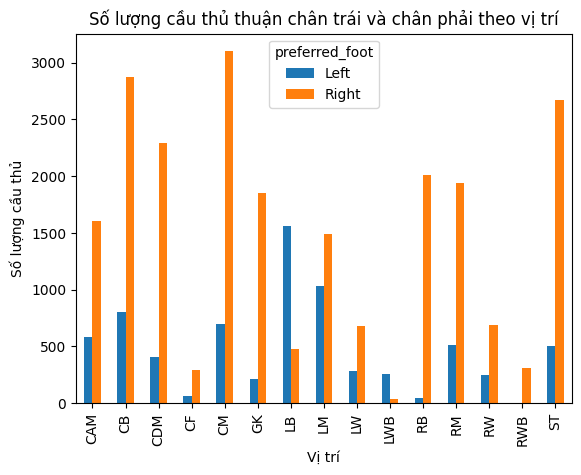

In [21]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', stacked=False)
plt.xlabel('Vị trí')
plt.ylabel('Số lượng cầu thủ')
plt.title('Số lượng cầu thủ thuận chân trái và chân phải theo vị trí')
plt.show()

### Câu hỏi 2: Kỹ năng của các cầu thủ sẽ ra sao ở trong các giai đoạn của sự nghiệp ?

### Mục tiêu: Tìm hiểu sự thay đổi của các kỹ năng theo thời gian trong sự nghiệp của cầu thủ ở các vị trí khác nhau.

Tổng quan các cột dữ liệu được sử dụng cho câu hỏi này: 

- Sẽ dựa vào vị trí chơi chính của cầu thủ.
- Sẽ chia độ tuổi sự nghiệp ra thành 3 giai đoạn: early (17-23 tuổi), mid (24-29 tuổi), late (từ 30 tuổi trở lên)
- Các cột kỹ năng sẽ xét: skill_moves, dribbling, ball_control, agility, reactions, vision, composure, strength.    

### Kiểm tra các cột dữ liệu có chứa giá trị null hay không ?

In [22]:
df.isnull().any()

name                             False
full_name                        False
birth_date                       False
age                              False
height_cm                        False
weight_kgs                       False
positions                        False
nationality                      False
overall_rating                   False
potential                        False
value_euro                        True
wage_euro                         True
preferred_foot                   False
international_reputation(1-5)    False
weak_foot(1-5)                   False
skill_moves(1-5)                 False
body_type                        False
release_clause_euro               True
crossing                         False
finishing                        False
heading_accuracy                 False
short_passing                    False
volleys                          False
dribbling                        False
curve                            False
freekick_accuracy        

### Chia ra thành ba dataframe dựa trên độ tuổi trong sự nghiệp

- Early: 17-23
- Mid: 24-29
- Late: > 30

In [23]:
# The skills that would be computed
skills = [
    'skill_moves(1-5)', 'dribbling', 'ball_control', 'agility', 'reactions', 'vision', 'composure', 'strength',
    'finishing', 'positioning', 'short_passing', 'long_passing', 'curve',
    'heading_accuracy', 'marking', 'acceleration', 'crossing', 'finishing'
]

# Divide into three dataframe based on age bin
df_early = df[(df['age'] >= 17) & (df['age'] < 24)]
df_mid = df[(df['age'] >= 24) & (df['age'] < 30)]
df_late = df[df['age'] >= 30]

# Create a primary_position column in df which stores the primary position of the player
def filter_for_primary_position(my_df):
    if ('primary_position' in my_df.columns): return
    my_df['primary_position'] = my_df['positions'].apply(lambda x: x.split(",")[0])

filter_for_primary_position(df_early)
filter_for_primary_position(df_mid)
filter_for_primary_position(df_late)


# Compute the average rating value for each column
df_early_avg = df_early.groupby('primary_position')[skills].mean()
df_mid_avg = df_mid.groupby('primary_position')[skills].mean()
df_late_avg = df_late.groupby('primary_position')[skills].mean()

/var/folders/13/nw165ws91y30x7r8_6b34m_m0000gn/T/ipykernel_54306/735456816.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['primary_position'] = my_df['positions'].apply(lambda x: x.split(",")[0])
/var/folders/13/nw165ws91y30x7r8_6b34m_m0000gn/T/ipykernel_54306/735456816.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['primary_position'] = my_df['positions'].apply(lambda x: x.split(",")[0])
/var/folders/13/nw165ws91y30x7r8_6b34m_m0000gn/T/ipykernel_54306/735456816.py:16: SettingWithCop

### Vẽ biểu đồ star chart cho từng (vị trí chơi, giai đoạn sự nghiệp)

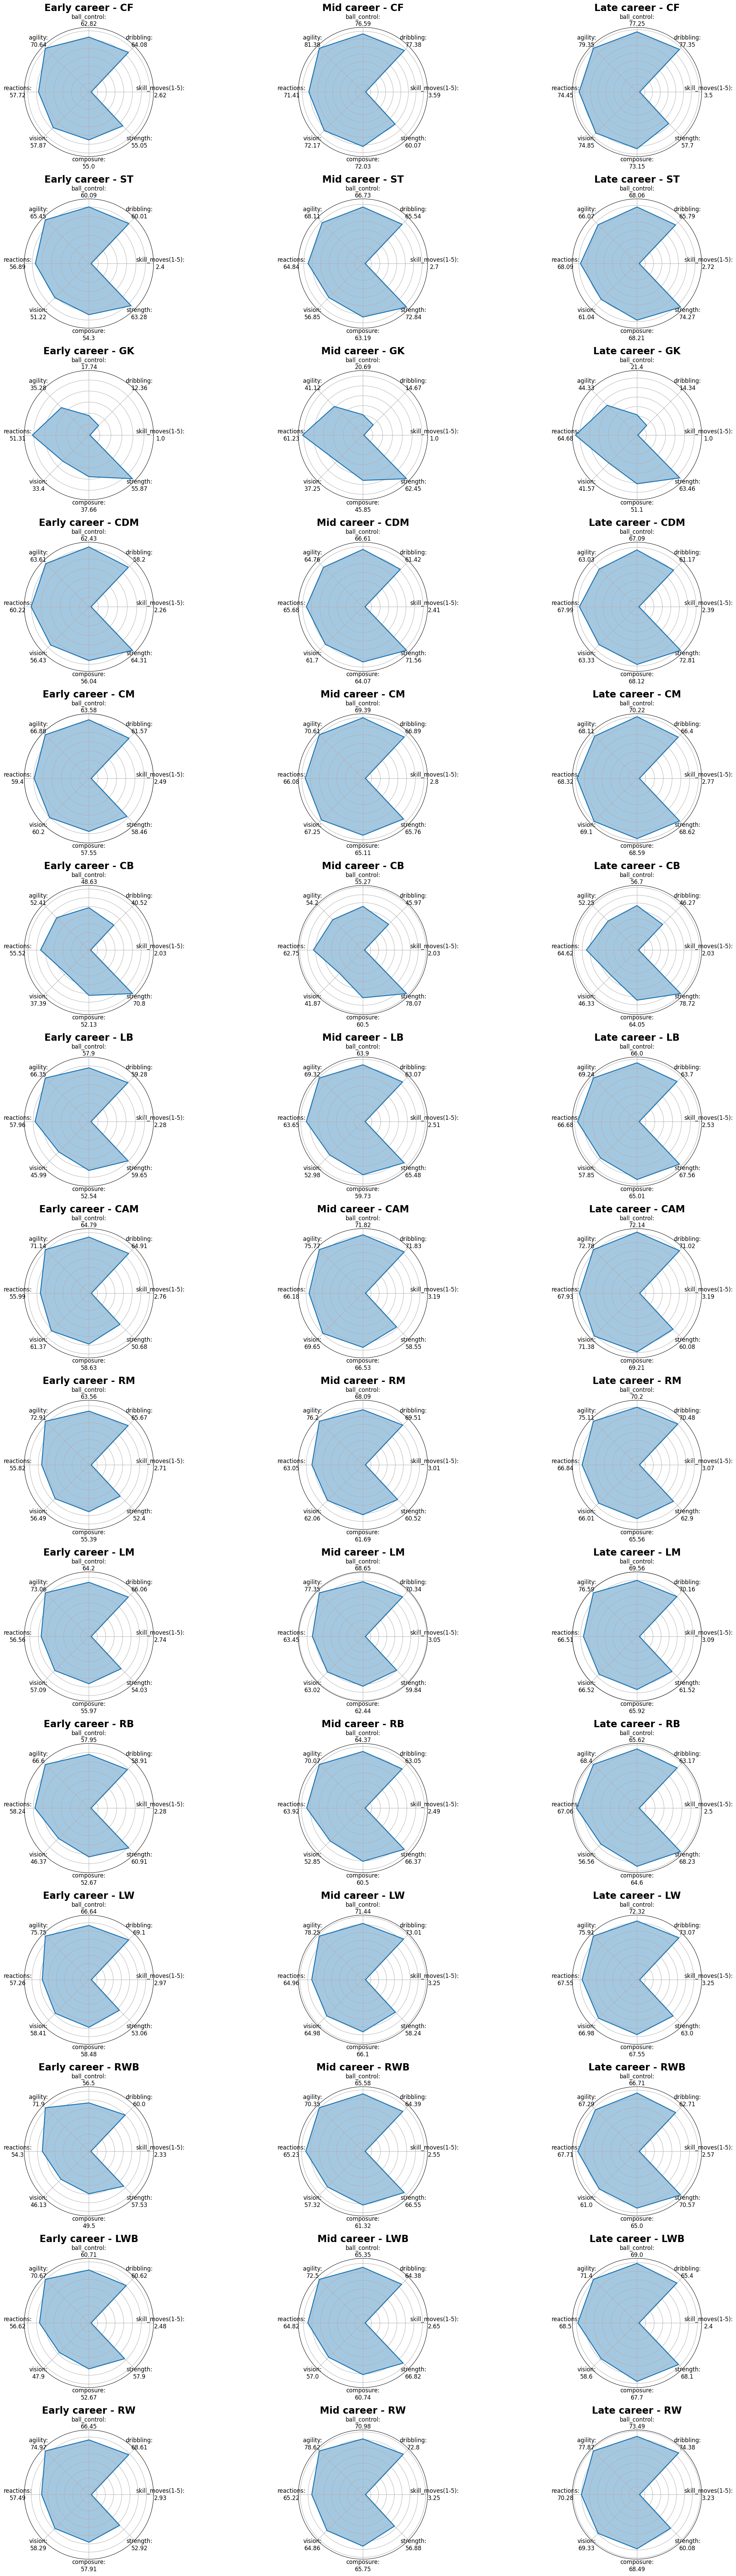

In [24]:
# The skills that would be considered in our analysis
general_skills = ['skill_moves(1-5)', 'dribbling', 'ball_control', 'agility', 'reactions', 'vision', 'composure', 'strength']

# Career phase
career_phase = ['Early', 'Mid', 'Late']

fig, axes = plt.subplots(15, 3, figsize = (25, 75), subplot_kw = dict(polar = True))

# Plot star graph for each (position, career_phase)
def plot_star_graph(ax, values, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    angles = list(angles)
    values = list(values)
    angles.append(angles[0])
    values.append(values[0])

    ax.plot(angles, values, linewidth = 2, linestyle = 'solid', label = title)
    ax.fill(angles, values, alpha = 0.4)

    labels = [f'{label}:\n{round(value, 2)}' for label, value in zip(labels, values)]
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize = 12)

    ax.set_title(title, fontsize = 20, fontweight = 'bold')

# Store all available positions in a football team into positions list
positions = df_late['primary_position'].unique()

dfs = [df_early, df_mid, df_late]
df_avgs = [df_early_avg, df_mid_avg, df_late_avg]

for i, position in enumerate(positions):
    for j, df_avg in enumerate(df_avgs):
        ax = axes[i, j]

        # Get the columns necessary for analysis, transpose it
        df_avg = df_avg[general_skills]
        df_avg = df_avg.T
        
        values = df_avg.loc[:, position].values
        
        labels = general_skills
        plot_star_graph(ax, values, labels, f"{career_phase[j]} career - {position}")

plt.tight_layout()
plt.show()

- Ở giai đoạn từ Early đến Mid, tất cả chỉ số đều phát triển ở mỗi vị trí
- Ở giai đoạn từ Mid đến Late, các chỉ số có dấu hiệu chững lại, một vài chỉ số bị giảm và cá biệt một vài chỉ số vẫn tăng.
- Ta thấy rằng biểu đồ radar chart phát triển mạnh nhất ở giai đoạn từ Early -> Mid với việc nhiều góc được mở ra thấy rõ, giai đoạn Mid -> Late chậm đi đáng kể và có sự giảm nhẹ chỉ số ở 1 vài vị trí.

Để tìm hiểu kỹ hơn các chỉ số nào thay đổi như thế nào, những kỹ năng nào được đồng phát triển nhất ở các vị trí. Ta sẽ tiếp tục tìm hiểu dưới đây.

Ta sẽ tạo ra 2 df thể hiện chênh lệch giữa (Mid - Early) và (Late - Mid).

In [25]:
# Get difference in skills for comparison
df_diff_early_mid = df_mid_avg[general_skills] - df_early_avg[general_skills]
df_diff_mid_late = df_late_avg[general_skills] - df_mid_avg[general_skills]

# Standardize skill_moves(1-5) to scale 100
df_diff_early_mid['skill_moves(1-5)'] = df_diff_early_mid['skill_moves(1-5)'] * 20
df_diff_mid_late['skill_moves(1-5)'] = df_diff_mid_late['skill_moves(1-5)'] * 20

# Rename, remove '(1-5)'
df_diff_early_mid.rename(columns = {'skill_moves(1-5)': 'skill_moves'}, inplace = True)
df_diff_mid_late.rename(columns = {'skill_moves(1-5)': 'skill_moves'}, inplace = True)

general_skills = ['skill_moves', 'dribbling', 'ball_control', 'agility', 'reactions', 'vision', 'composure', 'strength']



Ta sẽ tạo ra max_list và min_list, mỗi list sẽ gồm 2 list con tương ứng với df_diff_early_mid và df_diff_mid_late. Mỗi giá trị trong list con sẽ tương ứng với vị trí chơi và [skill đạt giá trị max/min, giá trị max/min]

In [26]:
max_list = [[], []]
min_list = [[], []]

# For each position, calculate the skill that got the max/min improvement in rating score
def get_prominent_skills_in_career_span(curr_df, i): 
    curr_df = curr_df.T

    for column in curr_df.columns:
        max_element = curr_df[column].nlargest(1)
        min_element = curr_df[column].nsmallest(1)
        
        max_list[i].append([max_element.index.values[0], max_element.values[0]])
        min_list[i].append([min_element.index.values[0], min_element.values[0]])

get_prominent_skills_in_career_span(df_diff_early_mid, 0)
get_prominent_skills_in_career_span(df_diff_mid_late, 1)
    

Ta sẽ tiến hành trực quan hoá để tìm ra kỹ năng có sự thay đổi lớn nhất và ít nhất (hoặc thụt lùi) ở mỗi vị trí chơi.

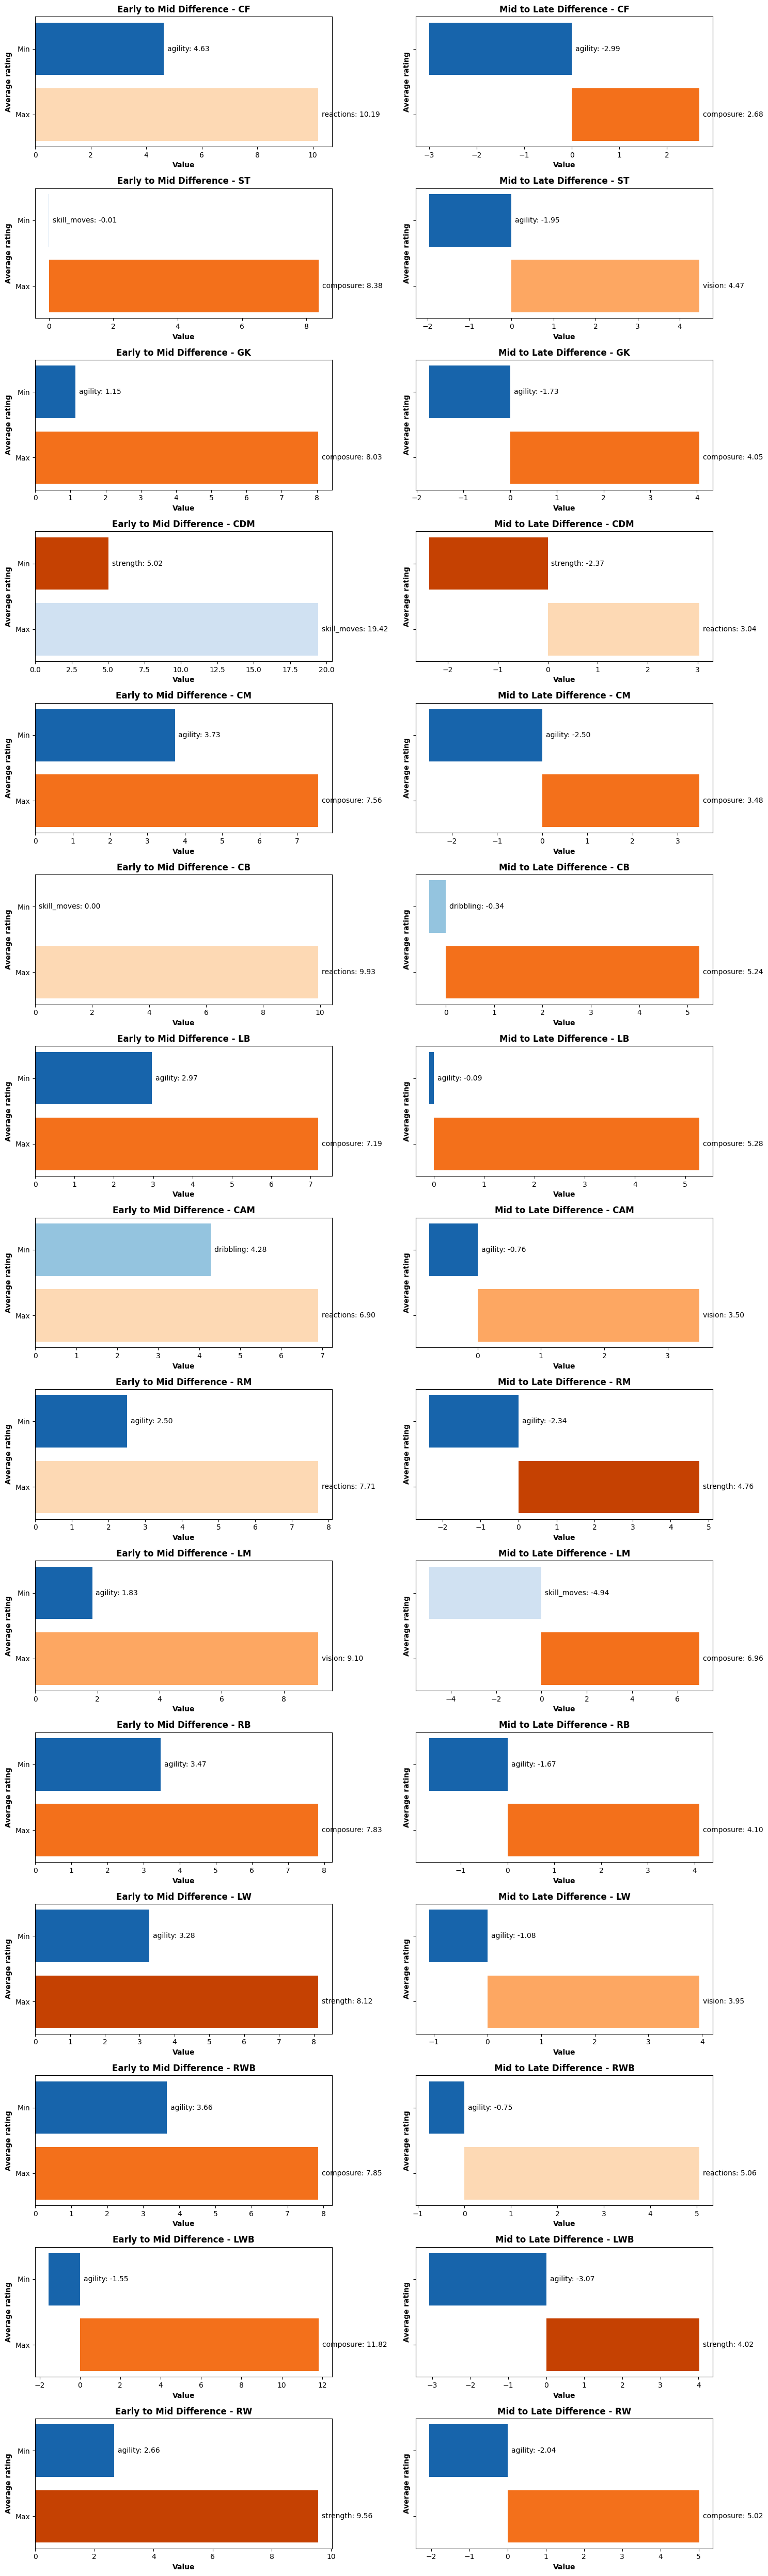

In [27]:
cold_colors = sns.color_palette("Blues", n_colors = 4)
hot_colors = sns.color_palette("Oranges", n_colors = 4)

colors = cold_colors + hot_colors
fig, axes = plt.subplots(15, 2, figsize = (15, 50), sharey = True)

career_phase = ['Early to Mid Difference', 'Mid to Late Difference']

# Plot bar chart that represent the max/min improvement in rating score
for i, position in enumerate(positions):
    for j in range(2):
        # Extract data for max and min values for the current position and career phase
        max_data = max_list[j][i]
        min_data = min_list[j][i]

        # Plot horizontal bar chart for max and min values with specified colors
        axes[i, j].barh(['Max', 'Min'], [max_data[1], min_data[1]], color = [colors[general_skills.index(max_data[0])], colors[general_skills.index(min_data[0])]])

        # Annotate the skill names and values on the right of the bars for max and min
        axes[i, j].annotate(f'{max_data[0]}: {max_data[1]:.2f}', 
                            xy = (max_data[1], 0),
                            xytext = (5, 5),
                            textcoords = 'offset points',
                            color = 'black', ha = 'left', va = 'top')

        axes[i, j].annotate(f'{min_data[0]}: {min_data[1]:.2f}', 
                            xy = (max(0, min_data[1]), 1),
                            xytext = (5, 5),
                            textcoords = 'offset points',
                            color = 'black', ha = 'left', va = 'top')

        # Set labels and title for the current subplot
        axes[i, j].set_xlabel('Value', fontweight = 'bold')
        axes[i, j].set_ylabel('Average rating', fontweight = 'bold')
        axes[i, j].set_title(f'{career_phase[j]} - {position}', fontweight = 'bold')



plt.tight_layout(w_pad = 2)
plt.show()


In [28]:
# Calculate the number of times a skill is presented as the max/min improved skill for each position, select top 1 only.
def number_of_improved_skills(i, my_list):
    counted_elements = Counter(item[0] for item in my_list[i] if item[1] > 0)
    sort_counted = counted_elements.most_common(1)
    
    for curr_skill in sort_counted: 
        position_with_this_skill = []

        # Retrieve more info about which position possess 'curr_skill' as the max/min improvement for that position.
        for idx, position in enumerate(positions):
            if (my_list[i][idx][0] == curr_skill[0]): 
                position_with_this_skill.append(position)

        print(f'Skill: {curr_skill[0]} - Count: {curr_skill[1]}\nPosition: {position_with_this_skill}\n')


# We will print the skill that got the max/min number of occurences, with a list of position correspond to that skill as well.
print("Early-Mid transition")
print("Max:")
number_of_improved_skills(0, max_list)
print("\nMin:")
number_of_improved_skills(0, min_list)

print('-----------------------------------------')
print("\nMid-Late transition")
print("Max:")
number_of_improved_skills(1, max_list)
print("\nMin:")
number_of_improved_skills(0, min_list)


Early-Mid transition
Max:
Skill: composure - Count: 7
Position: ['ST', 'GK', 'CM', 'LB', 'RB', 'RWB', 'LWB']


Min:
Skill: agility - Count: 10
Position: ['CF', 'GK', 'CM', 'LB', 'RM', 'LM', 'RB', 'LW', 'RWB', 'LWB', 'RW']

-----------------------------------------

Mid-Late transition
Max:
Skill: composure - Count: 8
Position: ['CF', 'GK', 'CM', 'CB', 'LB', 'LM', 'RB', 'RW']


Min:
Skill: agility - Count: 10
Position: ['CF', 'GK', 'CM', 'LB', 'RM', 'LM', 'RB', 'LW', 'RWB', 'LWB', 'RW']



Tiếp theo ta sẽ coi skill nào được cải thiện nhiều nhất

/var/folders/13/nw165ws91y30x7r8_6b34m_m0000gn/T/ipykernel_54306/79013094.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 45, ha = 'right')


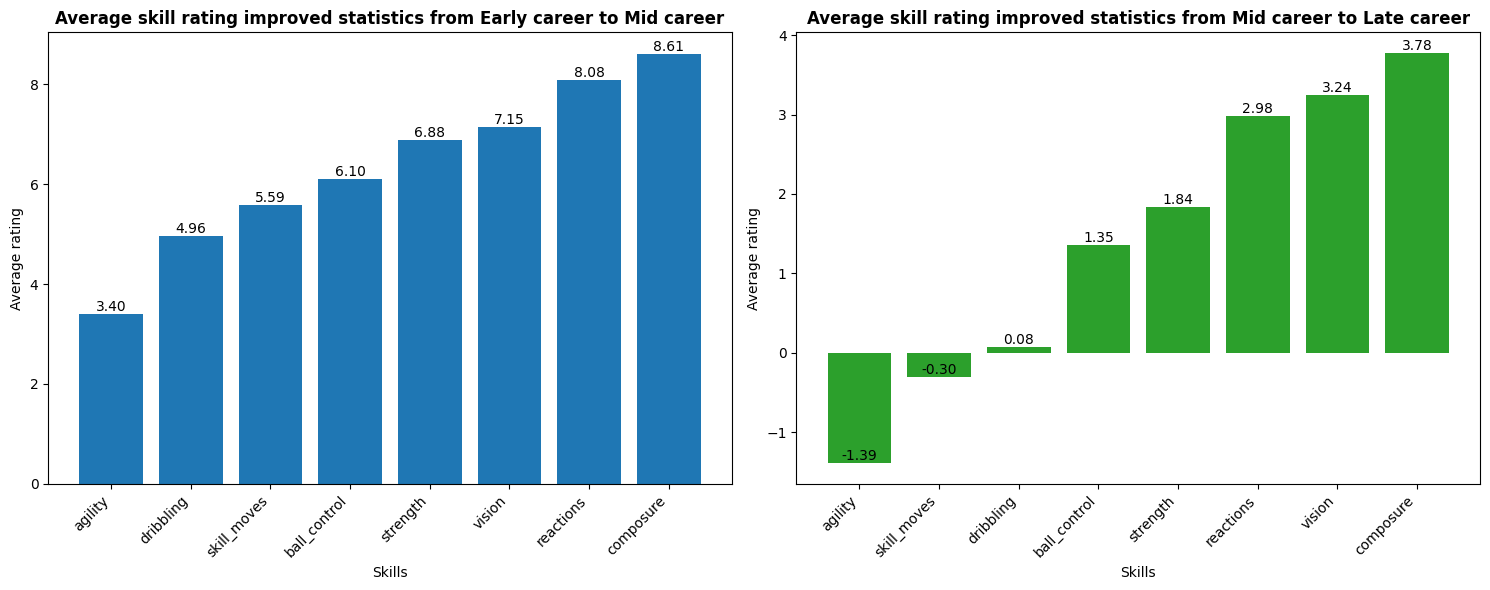

In [29]:
def plot_bar_chart(curr_df, ax, title, color='C0'):
    data = curr_df.mean()
    bar_data = []

    # Put into bar_data to sort from smallest value to largest value, put the 'val' first for default sort
    for skill, val in zip(curr_df.columns, data):
        bar_data.append([val, skill])
    
    bar_data = sorted(bar_data)
    
    x = [val[1] for val in bar_data]
    y = [val[0] for val in bar_data]

    bars = ax.bar(x, y, color = color)

    # Set labels and title for the subplot
    ax.set_xlabel('Skills')
    ax.set_ylabel('Average rating')
    ax.set_title(f'Average skill rating improved statistics from {title[0]} career to {title[1]} career', fontweight='bold')

    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(x, rotation = 45, ha = 'right')

    # Add text annotations on top of each bar
    for bar, value in zip(bars, y):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha = 'center', va = 'bottom', color = 'black')


fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot bar chart for both career span comparison
plot_bar_chart(df_diff_early_mid, ax[0], ['Early', 'Mid'])
plot_bar_chart(df_diff_mid_late, ax[1], ['Mid', 'Late'], color = 'C2')

plt.tight_layout()
plt.show()


Early-Mid: ta có thể thấy chỉ duy nhất chỉ số <b>agility(LWB)</b> và <b>skill_moves (GK)</b> bị thụt lùi hoặc ko đổi. Còn lại tất cả kỹ năng đều tăng khá mạnh, ở mục chỉ số tăng cao nhất, chỉ số bình tĩnh (composure) được ghi nhận tăng nhiều nhất ở 7 vị trí, với giá trị tăng trung bình là 8.08.

Mid-Late: cho thấy composure vẫn là kỹ năng tăng nhiều nhất ở các vị trí (8) mặc dù tỉ lệ không cao như trước (3.24).

Kết luận cho thấy bình tĩnh (composure) là kỹ năng có tỷ lệ phát triển cao nhất cả trong trong cả 2 giai đoạn so sánh, điều này chứng tỏ khả năng bình tĩnh là một yếu tố quan trọng và lâu dài trong quá trình phát triển kỹ năng của cầu thủ ở nhiều vị trí khác nhau, và nó không phụ thuộc vào độ tuổi hay vị trí thi đấu. Cầu thủ nâng cao khả năng bình tĩnh của mình có khả năng thể hiện tốt hơn, sự kiên nhẫn trong những tình huống áp lực và tăng cường hiệu suất của đội trên sân. Hiểu rõ hơn về sự quan trọng về lâu dài của khả năng bình tĩnh (composure) có thể giúp đưa ra một chương trình phát triển và huấn luyện chiến thuật cầu thủ ở nhiều độ tuổi và vị trí, nhấn mạnh vai trò của nó trong việc tối ưu hóa hiệu suất và sự bền vững trong sự nghiệp của một cầu thủ.

Agility là kỹ năng cải thiện ít nhất ở giai đoạn Early-Mid (3.4) và suy giảm nhiều nhất ở giai đoạn Mid-Late (-1.39). Agility cũng là kỹ năng cải thiện ít nhất ở rất nhiều vị trí ở cả 2 giai đoạn, Early-Mid: 10 và Mid-Late: 10. 

Điều này cho thấy agility không phải là một trong những yếu tố được tập trung phát triển trong giai đoạn trung ương của sự nghiệp cầu thủ và có thể trở nên ít quan trọng hơn khi cầu thủ vào giai đoạn cuối sự nghiệp. Trong cả hai giai đoạn, agility được xác định là kỹ năng ít phát triển ở rất nhiều vị trí, bao gồm CF, GK, CM, LB, RM, LM, RB, LW, RWB, LWB, RW. Điều này có thể ám chỉ rằng agility không phải là một yếu tố chính được tập trung đào tạo trong những giai đoạn quan trọng này và có thể ít quyết định đến sự phát triển của cầu thủ ở những vị trí này.
Mặc dù agility đóng vai trò quan trọng trong nhiều hoạt động bóng đá, nhưng có thể có các yếu tố khác như chiến thuật đội hình, phong cách chơi, hoặc sự thay đổi trong vai trò của cầu thủ, đóng góp đến việc giảm độ quan trọng của agility trong giai đoạn trung ương và cuối sự nghiệp của cầu thủ.

## 5. Tự đánh giá

### 5.1 Cá nhân

#### Vũ Hoàng Phúc

**Khó khăn gặp phải khi thực hiện đồ án?**

- Em chưa quen với việc sử dụng git và github
- Dữ liệu này có hơi nhiều cột dẫn tới hơi khó hiểu và khó xử lý
 
**Những điều đã học được?**
  
- Học cách sử dụng git cho khoa học dữ liệu
- Nắm bắt được quy trình của một dự án khoa học dữ liệu
- Rèn luyện các kĩ năng lập trình cho khoa học dữ liệu đã được học


### Phạm Tấn Anh Vũ

**Khó khăn gặp phải khi chưa thực hiện đồ án?**

- Gặp khó khăn khi mới tập làm việc với git.
- Khó khăn trong việc tìm câu hỏi có ý nghĩa.

**Những điều đã học được?**
  
- Học cách sử dụng git để làm việc nhóm
- Học được quy trình của khoa học dữ liệu.
- Học cách trực quan hoá các loại đồ thị khác nhau.

### 5.2 Nhóm

**Nếu có thêm thời gian nhóm sẽ làm gì?**
- Đặt nhiều câu hỏi hơi với sự thú vị và độ phức tạp cao hơn
- Áp dụng thêm các mô hình học mày để dự đoán một số giá trị trong dữ liệu này

## 6. Tài liệu tham khảo
[1] https://www.kaggle.com/code/isabelocastillo/an-lisis-de-jugadores-por-calificaci-n-general    
[2] https://www.kaggle.com/code/maso0dahmed/football-players-data-insight-eda
